## Forcing data analysis

In this notebook, forcing data for the Wflow model of Nakuru will be compared. The TAHMO data, available for two stations in the Lake Nakuru Catchment (TA00473 and TA00026) will be used as 'ground truth' to assess the quality of satellite data from KMD, CHRIPS and ERA5.

The satellite data will be spatialized based on Thiessen polygons from the KMD 'stations'. The locations of TA00473 lies within the polygon of KMD 'station' Pts2, and the location of TA00026 lies within the polygon of KMD 'station' Pts10. Therefore, the satellite data of these polygons will be compared to the TAHMO data.

Author: Joris-Martijn Schalkwijk
Date: 10/04/2025

In [1]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## loading, resampling and visualizing TAHMO data

TA00473 = pd.read_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-04-03 TAHMO\TA00473.csv")
TA00026 = pd.read_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-04-03 TAHMO\TA00026.csv")

TA00473['timestamp'] = pd.to_datetime(TA00473['timestamp'], format='%d/%m/%Y %H:%M')
TA00473.set_index('timestamp', inplace=True)

TA00026['timestamp'] = pd.to_datetime(TA00026['timestamp'], format='%Y-%m-%d %H:%M')
TA00026.set_index('timestamp', inplace=True)

TA00473 = TA00473.resample('D').sum()
TA00026 = TA00026.resample('D').sum()

TA00473_mon = TA00473.resample('ME').sum()
TA00473_mon = TA00473_mon.loc[TA00473_mon.index <= '2021-12-31']
TA00026_mon = TA00026.resample('ME').sum()
TA00026_mon = TA00026_mon.loc[TA00026_mon.index <= '2021-12-31']

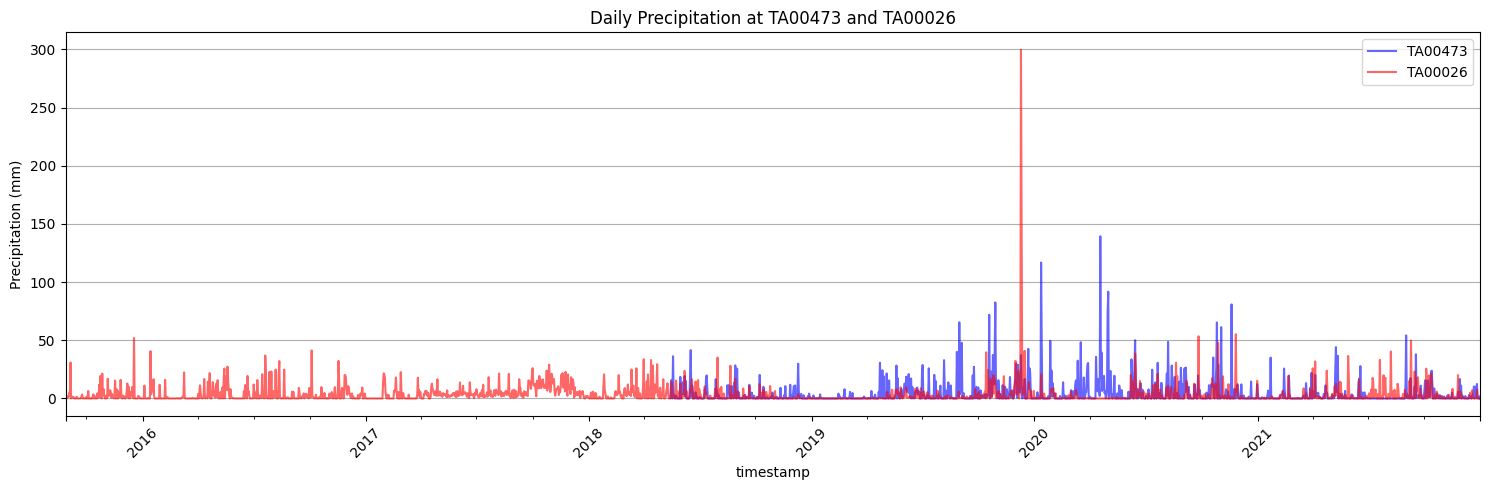

In [3]:

TA00473 = TA00473.loc[TA00473.index <= '2021-12-31']


TA00026 = TA00026.loc[TA00026.index <= '2021-12-31']
TA00026.to_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\TA00026.csv")

fig, ax = plt.subplots(figsize=(15, 5))

TA00473['precipitation (mm)'].plot(ax=ax, label='TA00473', color='blue', alpha=0.6)
TA00026['precipitation (mm)'].plot(ax=ax, label='TA00026', color='red', alpha=0.6)
ax.set_title('Daily Precipitation at TA00473 and TA00026')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
ax.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

### KMD data

Below, the KMD data for station Pts2 and Pts10 will be loaded. 



In [4]:
# load, resample and visualize KMD data

kmd_data = pd.read_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-03-13 KMD data Ruud\KMD and Lake\KMD_precipitation.csv", skiprows=4)
display(kmd_data)
kmd_data['DATE'] = pd.to_datetime(kmd_data['DATE'], format='%Y%m%d')
kmd_data.set_index('DATE', inplace=True)

,DATE,Pts2,Pts3,Pts4,Pts5,Pts6,Pts7,Pts8,Pts9,Pts10,Pts11,Pts12,Pts13,Pts14,Pts15
0,19810101,0.000,0.422,0.303,0.628,0.000,1.001,0.000,0.519,0.041,1.091,0.000,0.054,0.861,0.141
1,19810102,0.000,0.285,0.000,1.221,0.000,0.896,0.000,0.712,0.000,1.687,0.000,0.027,1.239,0.213
2,19810103,0.000,0.380,0.092,1.384,0.000,1.314,0.000,1.502,0.000,1.853,0.000,0.000,1.598,0.178
3,19810104,0.000,0.004,0.000,0.001,0.000,0.000,0.021,0.033,0.000,0.000,0.368,0.026,0.029,0.000
4,19810105,1.757,1.629,2.691,0.000,0.000,1.229,0.339,0.000,0.000,0.000,0.000,0.232,0.114,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,20211227,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.278,0.000,0.000,0.000,0.000
14971,20211228,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.678,0.000
14972,20211229,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.209,0.000,0.000,0.358,0.000
14973,20211230,0.188,0.483,0.405,0.187,0.638,1.078,0.000,0.000,0.924,1.960,0.000,0.000,0.191,0.770


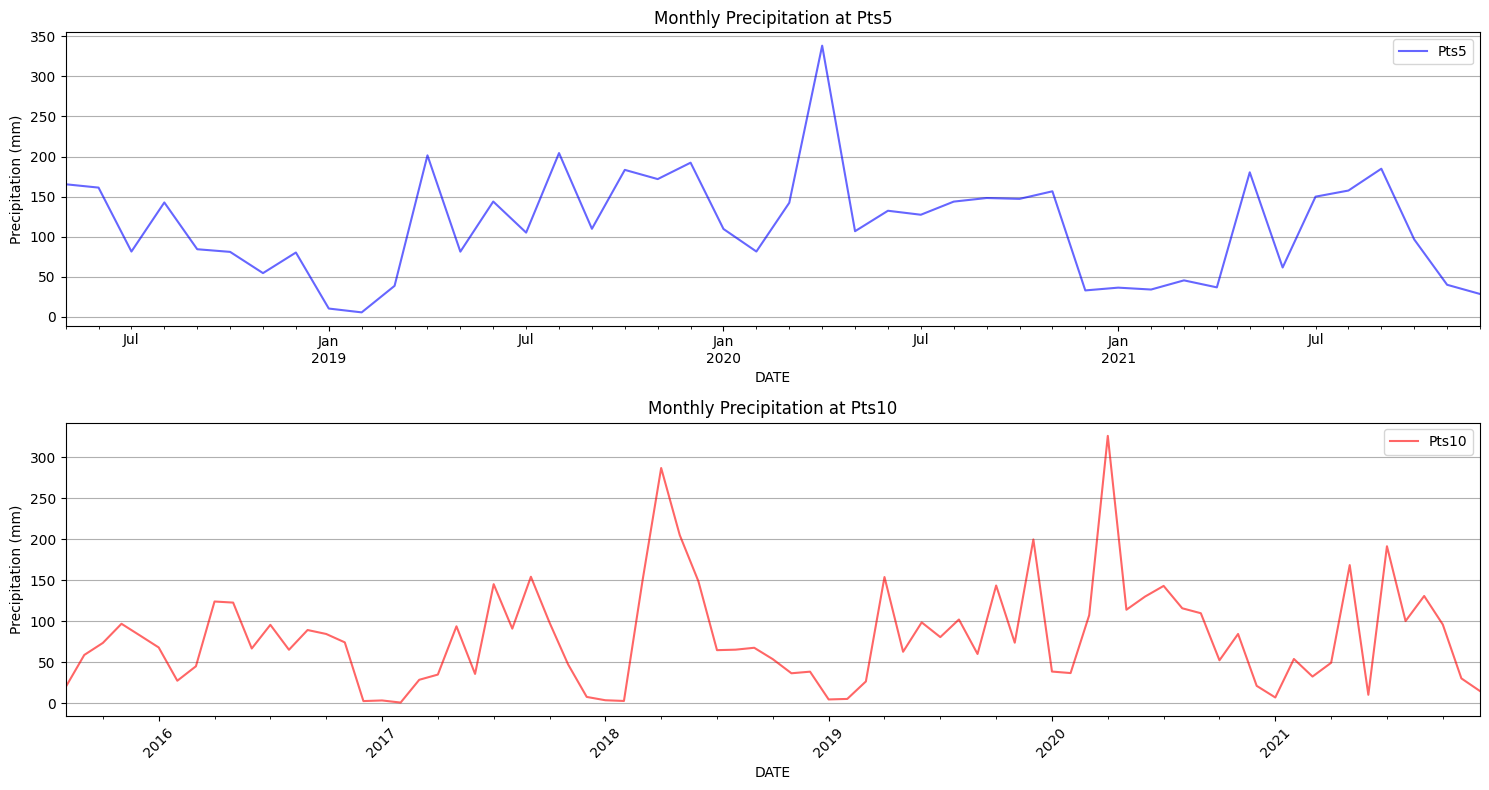

In [5]:
station_pts5_mon = kmd_data['Pts5'].resample('ME').sum()
station_pts5_mon = station_pts5_mon.loc[station_pts5_mon.index >= TA00473_mon.index[0]]
station_pts10_mon = kmd_data['Pts10'].resample('ME').sum()
station_pts10_mon = station_pts10_mon.loc[station_pts10_mon.index >= TA00026_mon.index[0]]

fig, ax = plt.subplots(2, 1, figsize=(15, 8))
station_pts5_mon.plot(ax=ax[0], label='Pts5', color='blue', alpha=0.6)
station_pts10_mon.plot(ax=ax[1], label='Pts10', color='red', alpha=0.6)
ax[0].set_title('Monthly Precipitation at Pts5')
ax[0].set_ylabel('Precipitation (mm)')
ax[1].set_title('Monthly Precipitation at Pts10')
ax[1].set_ylabel('Precipitation (mm)')
ax[0].legend()
ax[1].legend()
ax[0].grid(axis='y')
ax[1].grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

In [6]:
station_pts5 = kmd_data['Pts5'][(kmd_data['Pts5'].index >= TA00473.index[0]) & (kmd_data['Pts5'].index <= '2021-12-31')]
station_pts10 = kmd_data['Pts10'][(kmd_data['Pts10'].index >= TA00026.index[0]) & (kmd_data['Pts10'].index <= '2021-12-31')]

C:\Users\jmsch\AppData\Local\Temp\ipykernel_13116\3272143848.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  TA00473_monthly = TA00473.resample('M').sum()
C:\Users\jmsch\AppData\Local\Temp\ipykernel_13116\3272143848.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  station_pts5_monthly = station_pts5.resample('M').sum()


[1487.266]


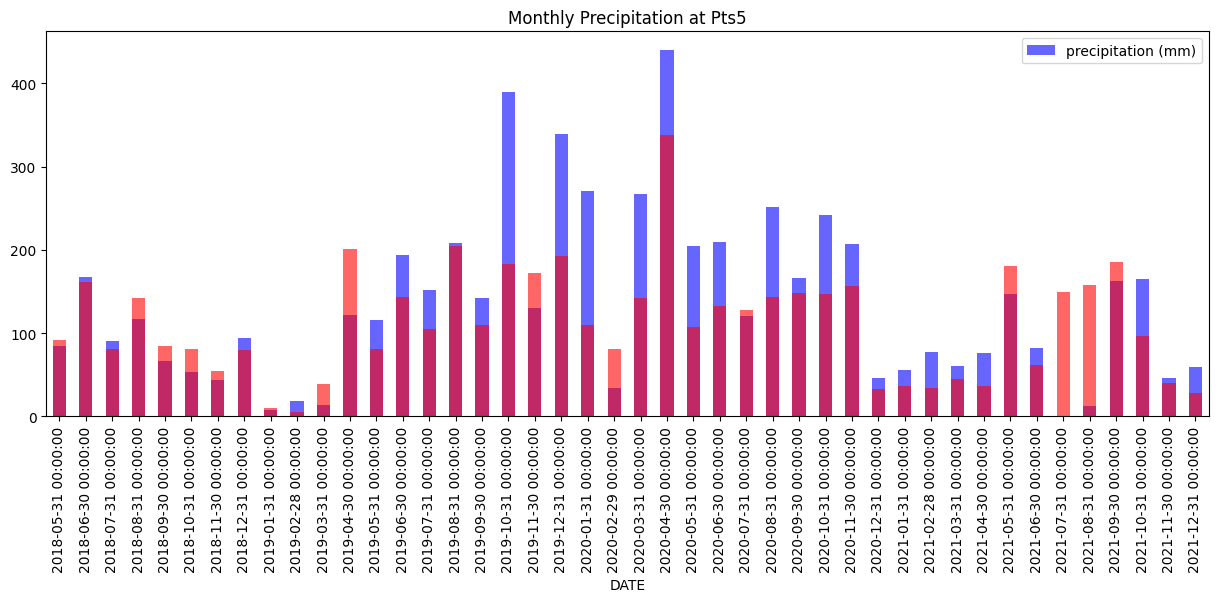

In [7]:
TA00473_yearly = TA00473.resample('YE').sum()
TA00473_monthly = TA00473.resample('M').sum()
TA00473_monthly.plot(kind = 'bar', figsize=(15, 5), title='Monthly Precipitation at TA00473', color='blue', alpha=0.6)
#TA00473_monthly_mean = TA00473_monthly.mean().values
TA00473_yearly_mean = TA00473_yearly.mean().values
print(TA00473_yearly_mean)

station_pts5_yearly = station_pts5.resample('YE').sum()
station_pts5_monthly = station_pts5.resample('M').sum()
station_pts5_monthly.plot(kind = 'bar', figsize=(15, 5), title='Monthly Precipitation at Pts5', color='red', alpha=0.6)
station_pts5_yearly_mean = station_pts5_yearly.mean()

TA00026_yearly = TA00026.resample('YE').sum()
TA00026_yearly_mean = TA00026_yearly.mean().values
#print(TA00026_yearly_mean)

station_pts10_yearly = station_pts10.resample('YE').sum()
station_pts10_yearly_mean = station_pts10_yearly.mean()

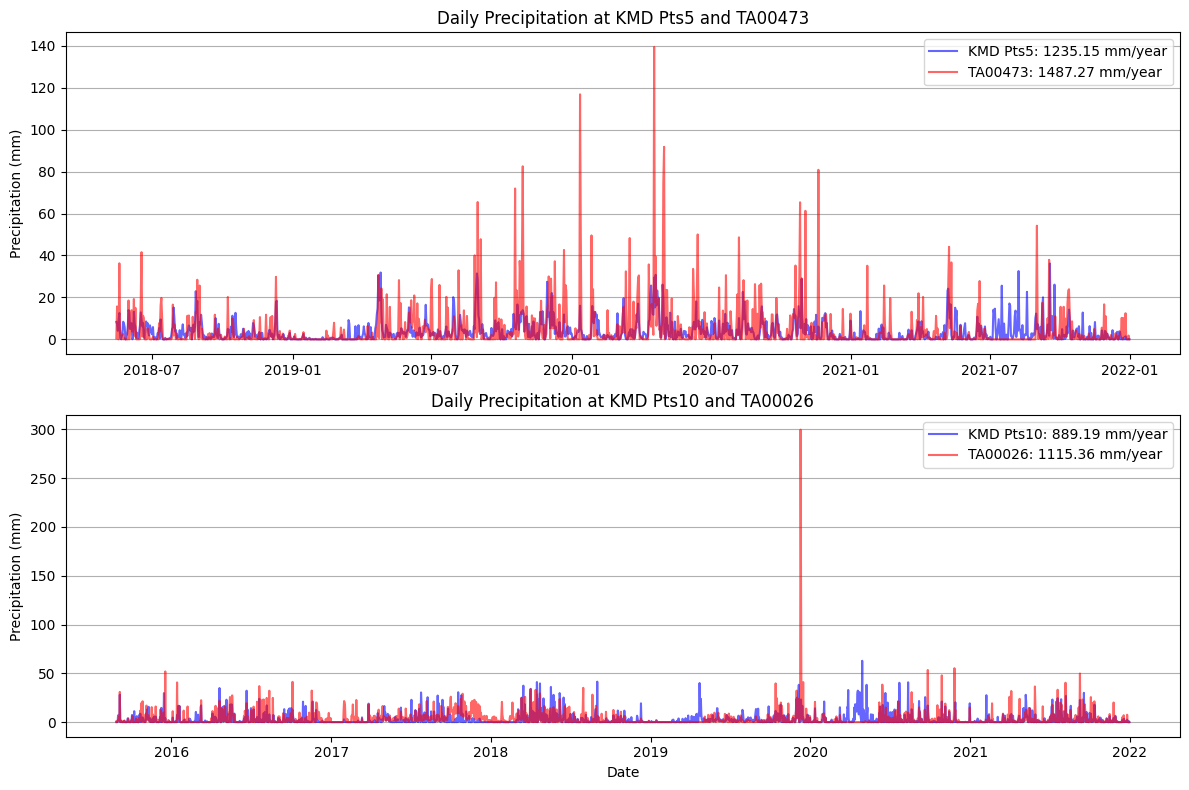

In [8]:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# First subplot
axs[0].plot(station_pts5.index, station_pts5.values, label=f"KMD Pts5: {station_pts5_yearly_mean:.2f} mm/year", color='blue', alpha=0.6)
axs[0].plot(TA00473.index, TA00473['precipitation (mm)'].values, label=f"TA00473: {TA00473_yearly_mean[0]:.2f} mm/year", color='red', alpha=0.6)
axs[0].legend()
axs[0].set_title('Daily Precipitation at KMD Pts5 and TA00473')
axs[0].set_ylabel('Precipitation (mm)')
axs[0].grid(axis='y')

# Second subplot
axs[1].plot(station_pts10.index, station_pts10.values, label=f"KMD Pts10: {station_pts10_yearly_mean:.2f} mm/year", color='blue', alpha=0.6)
axs[1].plot(TA00026.index, TA00026['precipitation (mm)'].values, label=f"TA00026: {TA00026_yearly_mean[0]:.2f} mm/year", color='red', alpha=0.6)
axs[1].legend()
axs[1].set_title('Daily Precipitation at KMD Pts10 and TA00026')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Precipitation (mm)')
axs[1].grid(axis='y')

# Beautify x-axis
#plt.xticks(rotation=45)
plt.tight_layout()


plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\KMD_vs_TAHMO_precipitation_timeseries.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:

#print(station_pts5_yearly_mean)

# Calculate the linear regression
slope_5, intercept_5, r_value_5, p_value_5, std_err_5 = linregress(TA00473['precipitation (mm)'], station_pts5.values)
r_squared_5 = r_value_5**2

slope_5_mon, intercept_5_mon, r_value_5_mon, p_value_5_mon, std_err_5_mon = linregress(TA00473_mon['precipitation (mm)'], station_pts5_mon.values)
r_squared_5_mon = r_value_5_mon**2


In [10]:

#print(station_pts10_yearly_mean)

# Calculate the linear regression
slope_10, intercept_10, r_value_10, p_value_10, std_err_10 = linregress(TA00026['precipitation (mm)'], station_pts10.values)
r_squared_10 = r_value_10**2

slope_10_mon, intercept_10_mon, r_value_10_mon, p_value_10_mon, std_err_10_mon = linregress(TA00026_mon['precipitation (mm)'], station_pts10_mon.values)
r_squared_10_mon = r_value_10_mon**2

In [11]:
#print(TA00473['precipitation (mm)'].values)
#print(station_pts5.values)

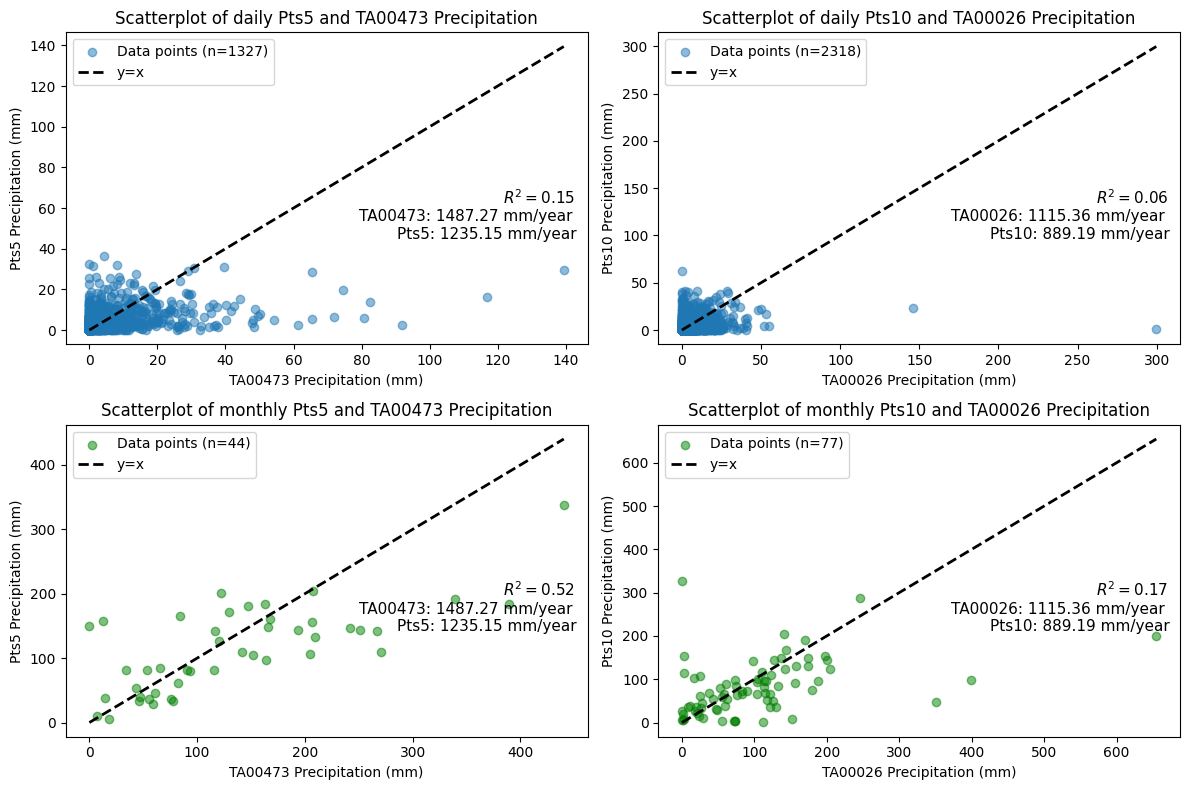

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0,0].scatter(TA00473['precipitation (mm)'], station_pts5.values, marker='o', alpha=0.5, label=f"Data points (n={len(TA00473['precipitation (mm)'])})")
x = np.linspace(0, TA00473['precipitation (mm)'].max(), len(TA00473['precipitation (mm)']))
y = x
ax[0,0].plot(x, y, 'k--', lw=2, label='y=x')
ax[0,0].set_xlabel('TA00473 Precipitation (mm)')
ax[0,0].text(0.98, 0.50, f'$R^2 = {r_squared_5:.2f}$ \nTA00473: {TA00473_yearly_mean[0]:.2f} mm/year \nPts5: {station_pts5_yearly_mean:.2f} mm/year',
         transform=ax[0,0].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax[0,0].set_ylabel('Pts5 Precipitation (mm)')
ax[0,0].set_title('Scatterplot of daily Pts5 and TA00473 Precipitation')
ax[0,0].legend()
plt.tight_layout()


ax[0,1].scatter(TA00026['precipitation (mm)'], station_pts10.values, marker='o', alpha=0.5, label=f"Data points (n={len(TA00026['precipitation (mm)'])})")
x1 = np.linspace(0, TA00026['precipitation (mm)'].max(), len(TA00026['precipitation (mm)']))
y1 = x1
ax[0,1].plot(x1, y1, 'k--', lw=2, label='y=x')
ax[0,1].set_xlabel('TA00026 Precipitation (mm)')
ax[0,1].text(0.98, 0.5, f'$R^2 = {r_squared_10:.2f}$ \nTA00026: {TA00026_yearly_mean[0]:.2f} mm/year \nPts10: {station_pts10_yearly_mean:.2f} mm/year',
            transform=ax[0,1].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax[0,1].set_ylabel('Pts10 Precipitation (mm)')
ax[0,1].set_title('Scatterplot of daily Pts10 and TA00026 Precipitation')

ax[0,1].legend()
plt.tight_layout()

ax[1,0].scatter(TA00473_mon['precipitation (mm)'], station_pts5_mon.values, marker='o', color='green', alpha=0.5, label=f"Data points (n={len(TA00473_mon['precipitation (mm)'])})")
x2 = np.linspace(0, TA00473_mon['precipitation (mm)'].max(), len(TA00473_mon['precipitation (mm)']))
y2 = x2
ax[1,0].plot(x2, y2, 'k--', lw=2, label='y=x')
ax[1,0].set_xlabel('TA00473 Precipitation (mm)')
ax[1,0].text(0.98, 0.50, f'$R^2 = {r_squared_5_mon:.2f}$ \nTA00473: {TA00473_yearly_mean[0]:.2f} mm/year \nPts5: {station_pts5_yearly_mean:.2f} mm/year',
         transform=ax[1,0].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax[1,0].set_ylabel('Pts5 Precipitation (mm)')
ax[1,0].set_title('Scatterplot of monthly Pts5 and TA00473 Precipitation')
ax[1,0].legend()
plt.tight_layout()

ax[1,1].scatter(TA00026_mon['precipitation (mm)'], station_pts10_mon.values, marker='o', alpha=0.5, color='green', label=f"Data points (n={len(TA00026_mon['precipitation (mm)'])})")
x1 = np.linspace(0, TA00026_mon['precipitation (mm)'].max(), len(TA00026_mon['precipitation (mm)']))
y1 = x1
ax[1,1].plot(x1, y1, 'k--', lw=2, label='y=x')
ax[1,1].set_xlabel('TA00026 Precipitation (mm)')
ax[1,1].text(0.98, 0.5, f'$R^2 = {r_squared_10_mon:.2f}$ \nTA00026: {TA00026_yearly_mean[0]:.2f} mm/year \nPts10: {station_pts10_yearly_mean:.2f} mm/year',
            transform=ax[1,1].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax[1,1].set_ylabel('Pts10 Precipitation (mm)')
ax[1,1].set_title('Scatterplot of monthly Pts10 and TA00026 Precipitation')

ax[1,1].legend()
plt.tight_layout()


plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\KMD_vs_TAHMO_precipitation_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
import xarray as xr

## CHIRPS data

In [14]:
chirps_data = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 CHIRPS\stacked\stacked_CHIRPS_rainfall_2007_2021.nc")
tahmo_locs = pd.read_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\DATA\2025-04-03 TAHMO\stations_metadata.csv", usecols=[0,4,5])

In [15]:
display(chirps_data)
print(tahmo_locs)

<xarray.Dataset> Size: 2MB
Dimensions:        (lon: 7, lat: 10, time: 5479)
Coordinates:
  * lon            (lon) float64 56B 35.88 35.93 35.98 36.03 36.08 36.13 36.18
  * lat            (lat) float64 80B -0.225 -0.275 -0.325 ... -0.625 -0.675
  * time           (time) datetime64[ns] 44kB 2007-01-01 ... 2021-12-31
Data variables:
    spatial_ref    int32 4B ...
    precipitation  (time, lat, lon) float32 2MB ...

  station code  latitude  longitude
0      TA00026 -0.287122  36.169981
1      TA00473 -0.512371  35.956813


In [16]:
chirps_point_TA00026 = chirps_data.sel(lat=tahmo_locs['latitude'][tahmo_locs['station code'] == 'TA00026'].values[0], lon=tahmo_locs['longitude'][tahmo_locs['station code'] == 'TA00026'].values[0], method='nearest')
chirps_precip_TA00026 = chirps_point_TA00026['precipitation']
chirps_precip_TA00026_df = chirps_precip_TA00026.to_dataframe().reset_index()
chirps_precip_TA00026_df = chirps_precip_TA00026_df.loc[(chirps_precip_TA00026_df['time'] >= TA00026.index[0]) & (chirps_precip_TA00026_df['time'] <= '2021-12-31')]
chirps_precip_TA00026_df['time'] = pd.to_datetime(chirps_precip_TA00026_df['time'], format='%Y-%m-%d')
chirps_precip_TA00026_df.set_index('time', inplace=True)

chirps_precip_TA00026_df.to_csv(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\chirps_precip_TA00026.csv")

chirps_precip_TA00026_df_mon = chirps_precip_TA00026_df['precipitation'].resample('ME').sum()
#print(chirps_precip_TA00026_df.head())
chirps_precip_TA00026_df_yearly = chirps_precip_TA00026_df['precipitation'].resample('YE').sum()
chirps_precip_TA00026_df_yearly_mean = chirps_precip_TA00026_df_yearly.mean()
#print(chirps_precip_TA00026_df_yearly_mean)

#print(len(chirps_precip_TA00026_df['precipitation']))

chirps_point_TA00473 = chirps_data.sel(lat=tahmo_locs['latitude'][tahmo_locs['station code'] == 'TA00473'].values[0], lon=tahmo_locs['longitude'][tahmo_locs['station code'] == 'TA00473'].values[0], method='nearest')
chirps_precip_TA00473 = chirps_point_TA00473['precipitation']
chirps_precip_TA00473_df = chirps_precip_TA00473.to_dataframe().reset_index()
chirps_precip_TA00473_df = chirps_precip_TA00473_df.loc[(chirps_precip_TA00473_df['time'] >= TA00473.index[0]) & (chirps_precip_TA00473_df['time'] <= '2021-12-31')]
chirps_precip_TA00473_df['time'] = pd.to_datetime(chirps_precip_TA00473_df['time'], format='%Y-%m-%d')
chirps_precip_TA00473_df.set_index('time', inplace=True)

chirps_precip_TA00473_df_mon = chirps_precip_TA00473_df['precipitation'].resample('ME').sum()
#print(chirps_precip_TA00473_df.head())
chirps_precip_TA00473_df_yearly = chirps_precip_TA00473_df['precipitation'].resample('YE').sum()
chirps_precip_TA00473_df_yearly_mean = chirps_precip_TA00473_df_yearly.mean()
#print(chirps_precip_TA00473_df_yearly_mean)

print(chirps_precip_TA00026_df_mon)



time
2015-08-31      0.000000
2015-09-30     43.965538
2015-10-31    117.389313
2015-11-30    160.709686
2015-12-31     59.987011
                 ...    
2021-08-31     90.900726
2021-09-30    130.883484
2021-10-31    101.366058
2021-11-30     47.659130
2021-12-31     38.293736
Freq: ME, Name: precipitation, Length: 77, dtype: float32


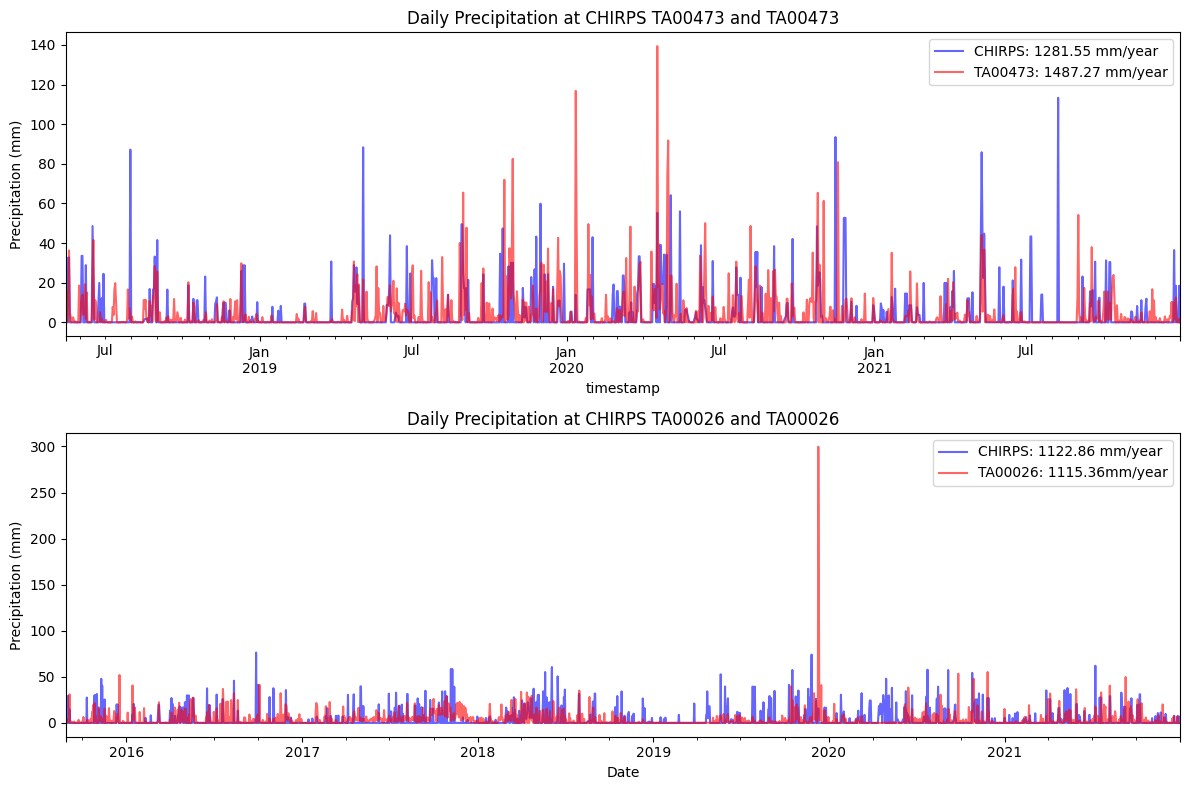

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

chirps_precip_TA00473_df['precipitation'].plot(ax=ax[0], label=f'CHIRPS: {chirps_precip_TA00473_df_yearly_mean:.2f} mm/year', color='blue', alpha=0.6)
TA00473['precipitation (mm)'].plot(ax=ax[0],label=f'TA00473: {TA00473_yearly_mean[0]:.2f} mm/year', color='red', alpha=0.6)
ax[0].set_title('Daily Precipitation at CHIRPS TA00473 and TA00473')
ax[0].set_ylabel('Precipitation (mm)')
ax[0].legend()

chirps_precip_TA00026_df['precipitation'].plot(ax=ax[1], label=f'CHIRPS: {chirps_precip_TA00026_df_yearly_mean:.2f} mm/year', color='blue', alpha=0.6)
TA00026['precipitation (mm)'].plot(ax=ax[1],label=f'TA00026: {TA00026_yearly_mean[0]:.2f}mm/year', color='red', alpha=0.6)
ax[1].set_title('Daily Precipitation at CHIRPS TA00026 and TA00026')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Precipitation (mm)')
ax[1].legend()

plt.tight_layout()

plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\CHIRPS_vs_TAHMO_precipitation_timeseries.png", dpi=300, bbox_inches='tight')
plt.show()



In [18]:
# Calculate the linear regression
slope_26, intercept_26, r_value_chirps_26, p_value_26, std_err_26 = linregress(TA00026['precipitation (mm)'], chirps_precip_TA00026_df['precipitation'])
r_squared_chirps_26 = r_value_chirps_26**2
print(r_squared_chirps_26)

slope_26_mon, intercept_26_mon, r_value_26_mon, p_value_26_mon, std_err_26_mon = linregress(TA00026_mon['precipitation (mm)'], chirps_precip_TA00026_df_mon.values)
r_squared_26_mon = r_value_26_mon**2

slope_473, intercept_473, r_value_chirps_473, p_value_473, std_err_473 = linregress(TA00473['precipitation (mm)'], chirps_precip_TA00473_df['precipitation'])
r_squared_chirps_473 = r_value_chirps_473**2
print(r_squared_chirps_473)

slope_473_mon, intercept_473_mon, r_value_473_mon, p_value_473_mon, std_err_473_mon = linregress(TA00473_mon['precipitation (mm)'], chirps_precip_TA00473_df_mon.values)
r_squared_473_mon = r_value_473_mon**2


0.02724697039515404
0.07660473051579905


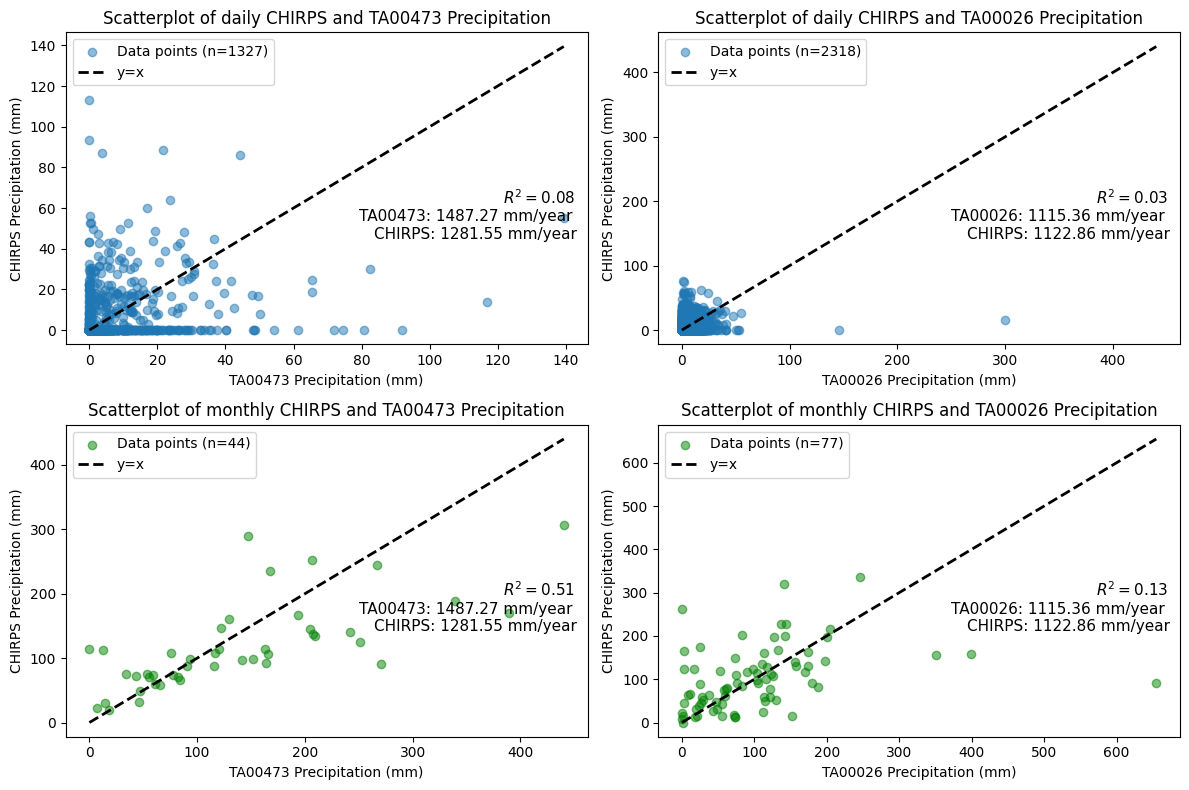

In [19]:
fig1, ax1 = plt.subplots(2, 2, figsize=(12, 8))

ax1[0,0].scatter(TA00473['precipitation (mm)'], chirps_precip_TA00473_df['precipitation'], marker='o', alpha=0.5, label=f"Data points (n={len(TA00473['precipitation (mm)'])})")
ax1[0,0].plot(x, y, 'k--', lw=2, label='y=x')
ax1[0,0].set_xlabel('TA00473 Precipitation (mm)')
ax1[0,0].text(0.98, 0.50, f'$R^2 = {r_squared_chirps_473:.2f}$ \nTA00473: {TA00473_yearly_mean[0]:.2f} mm/year \nCHIRPS: {chirps_precip_TA00473_df_yearly_mean:.2f} mm/year',
         transform=ax1[0,0].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[0,0].set_ylabel('CHIRPS Precipitation (mm)')
ax1[0,0].set_title('Scatterplot of daily CHIRPS and TA00473 Precipitation')
ax1[0,0].legend()
plt.tight_layout()

ax1[0,1].scatter(TA00026['precipitation (mm)'], chirps_precip_TA00026_df['precipitation'], marker='o', alpha=0.5, label=f"Data points (n={len(TA00026['precipitation (mm)'])})")
ax1[0,1].plot(x2, y2, 'k--', lw=2, label='y=x')
ax1[0,1].set_xlabel('TA00026 Precipitation (mm)')
ax1[0,1].text(0.98, 0.5, f'$R^2 = {r_squared_chirps_26:.2f}$ \nTA00026: {TA00026_yearly_mean[0]:.2f} mm/year \nCHIRPS: {chirps_precip_TA00026_df_yearly_mean:.2f} mm/year',
            transform=ax1[0,1].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[0,1].set_ylabel('CHIRPS Precipitation (mm)')
ax1[0,1].set_title('Scatterplot of daily CHIRPS and TA00026 Precipitation')

ax1[0,1].legend()
plt.tight_layout()

ax1[1,0].scatter(TA00473_mon['precipitation (mm)'], chirps_precip_TA00473_df_mon.values, marker='o', color='green', alpha=0.5, label=f"Data points (n={len(TA00473_mon['precipitation (mm)'])})")
ax1[1,0].plot(x2, y2, 'k--', lw=2, label='y=x')
ax1[1,0].set_xlabel('TA00473 Precipitation (mm)')
ax1[1,0].text(0.98, 0.50, f'$R^2 = {r_squared_473_mon:.2f}$ \nTA00473: {TA00473_yearly_mean[0]:.2f} mm/year \nCHIRPS: {chirps_precip_TA00473_df_yearly_mean:.2f} mm/year',
         transform=ax1[1,0].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[1,0].set_ylabel('CHIRPS Precipitation (mm)')
ax1[1,0].set_title('Scatterplot of monthly CHIRPS and TA00473 Precipitation')
ax1[1,0].legend()
plt.tight_layout()

ax1[1,1].scatter(TA00026_mon['precipitation (mm)'], chirps_precip_TA00026_df_mon.values, marker='o', alpha=0.5, color='green', label=f"Data points (n={len(TA00026_mon['precipitation (mm)'])})")
ax1[1,1].plot(x1, y1, 'k--', lw=2, label='y=x')
ax1[1,1].set_xlabel('TA00026 Precipitation (mm)')
ax1[1,1].text(0.98, 0.5, f'$R^2 = {r_squared_26_mon:.2f}$ \nTA00026: {TA00026_yearly_mean[0]:.2f} mm/year \nCHIRPS: {chirps_precip_TA00026_df_yearly_mean:.2f} mm/year',
            transform=ax1[1,1].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[1,1].set_ylabel('CHIRPS Precipitation (mm)')
ax1[1,1].set_title('Scatterplot of monthly CHIRPS and TA00026 Precipitation')

ax1[1,1].legend()
plt.tight_layout()

plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\CHIRPS_vs_TAHMO_precipitation_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
era5_data = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\2025-04-04 ERA5\combined_dataset_new_daily_time.nc")

display(era5_data)

<xarray.Dataset> Size: 833kB
Dimensions:    (latitude: 3, longitude: 2, time: 5479)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 24B -0.216 -0.466 -0.717
  * longitude  (longitude) float64 16B 35.84 36.09
  * time       (time) datetime64[ns] 44kB 2007-01-01 2007-01-02 ... 2021-12-31
Data variables:
    tp         (time, latitude, longitude) float32 131kB ...
    pev        (time, latitude, longitude) float32 131kB ...
    t2m        (time, latitude, longitude) float32 131kB ...
    msl        (time, latitude, longitude) float32 131kB ...
    ssrd       (time, latitude, longitude) float32 131kB ...
    tisr       (time, latitude, longitude) float32 131kB ...
Attributes: (12/32)
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m
    long_name:                                Total precipitation
    units:                                    m
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [21]:
era5_point_TA00026 = era5_data.sel(latitude=tahmo_locs['latitude'][tahmo_locs['station code'] == 'TA00026'].values[0], longitude=tahmo_locs['longitude'][tahmo_locs['station code'] == 'TA00026'].values[0], method='nearest')
era5_precip_TA00026 = era5_point_TA00026['tp']*1000
era5_precip_TA00026_df = era5_precip_TA00026.to_dataframe().reset_index()
era5_precip_TA00026_df = era5_precip_TA00026_df.loc[(era5_precip_TA00026_df['time'] >= TA00026.index[0])]
era5_precip_TA00026_df['time'] = pd.to_datetime(era5_precip_TA00026_df['time'], format='%Y-%m-%d')
era5_precip_TA00026_df.set_index('time', inplace=True)

era5_precip_TA00026_df = era5_precip_TA00026_df.resample('D').sum()
era5_precip_TA00026_mon = era5_precip_TA00026_df.resample('ME').sum()
era5_precip_TA00026_df_yearly = era5_precip_TA00026_df['tp'].resample('YE').sum()
era5_precip_TA00026_df_yearly_mean = era5_precip_TA00026_df_yearly.mean()
#print(era5_precip_TA00026_df.head())
#print(era5_precip_TA00026_df_yearly_mean)

era5_point_TA00473 = era5_data.sel(latitude=tahmo_locs['latitude'][tahmo_locs['station code'] == 'TA00473'].values[0], longitude=tahmo_locs['longitude'][tahmo_locs['station code'] == 'TA00473'].values[0], method='nearest')
era5_precip_TA00473 = era5_point_TA00473['tp']*1000
era5_precip_TA00473_df = era5_precip_TA00473.to_dataframe().reset_index()
era5_precip_TA00473_df = era5_precip_TA00473_df.loc[era5_precip_TA00473_df['time'] >= TA00473.index[0]]
era5_precip_TA00473_df['time'] = pd.to_datetime(era5_precip_TA00473_df['time'], format='%Y-%m-%d')
era5_precip_TA00473_df.set_index('time', inplace=True)

era5_precip_TA00473_df = era5_precip_TA00473_df.resample('D').sum()
#print(era5_precip_TA00473_df.head())
era5_precip_TA00473_mon = era5_precip_TA00473_df.resample('ME').sum()
era5_precip_TA00473_df_yearly = era5_precip_TA00473_df['tp'].resample('YE').sum()
era5_precip_TA00473_df_yearly_mean = era5_precip_TA00473_df_yearly.mean()
#print(era5_precip_TA00473_df_yearly_mean)

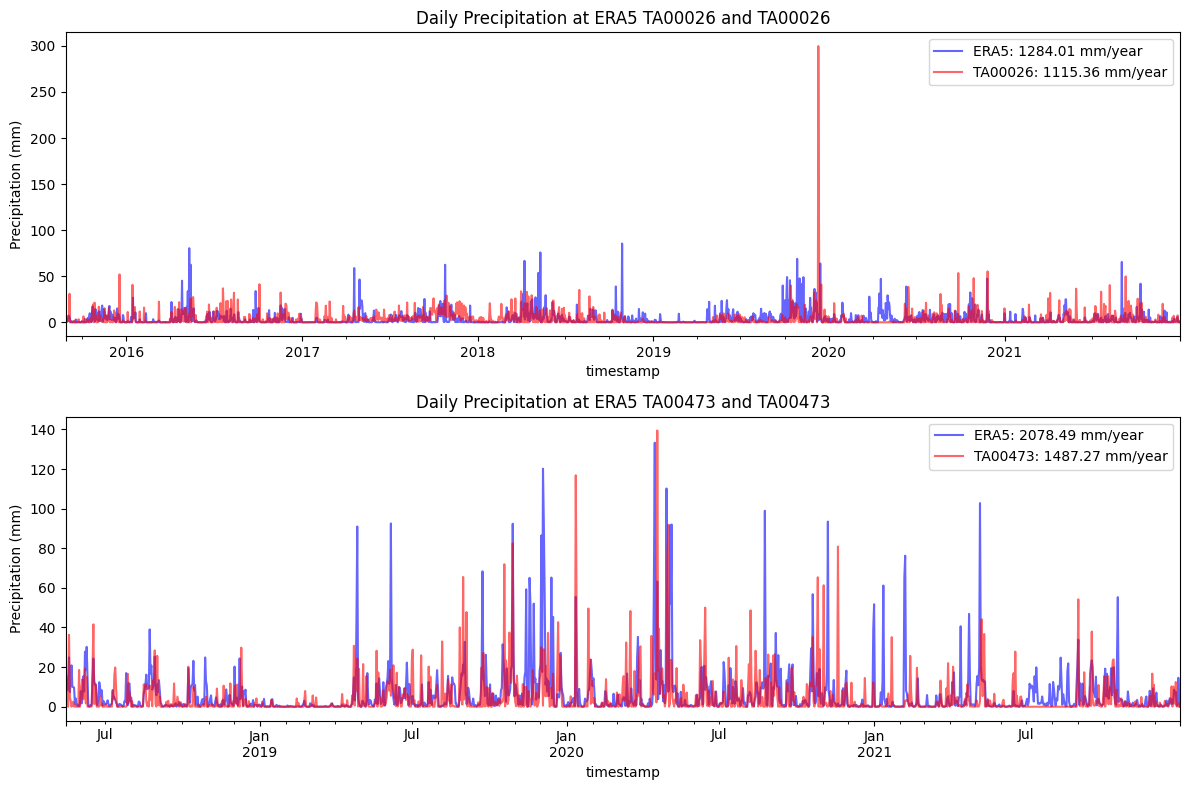

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

era5_precip_TA00026_df['tp'].plot(ax=ax[0], label=f'ERA5: {era5_precip_TA00026_df_yearly_mean:.2f} mm/year', color='blue', alpha=0.6)
TA00026['precipitation (mm)'].plot(ax=ax[0],label=f'TA00026: {TA00026_yearly_mean[0]:.2f} mm/year', color='red', alpha=0.6)
ax[0].set_title('Daily Precipitation at ERA5 TA00026 and TA00026')
ax[0].set_ylabel('Precipitation (mm)')
ax[0].legend()


#fig1, ax1 = plt.subplots(figsize=(15, 5))

era5_precip_TA00473_df['tp'].plot(ax=ax[1], label=f'ERA5: {era5_precip_TA00473_df_yearly_mean:.2f} mm/year', color='blue', alpha=0.6)
TA00473['precipitation (mm)'].plot(ax=ax[1],label=f'TA00473: {TA00473_yearly_mean[0]:.2f} mm/year', color='red', alpha=0.6)
ax[1].set_title('Daily Precipitation at ERA5 TA00473 and TA00473')
ax[1].set_ylabel('Precipitation (mm)')
ax[1].legend()

plt.tight_layout()

plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\ERA5_vs_TAHMO_precipitation_timeseries.png", dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# Calculate the linear regression
slope_26_era5, intercept_26_era5, r_value_era5_26, p_value_26_era5, std_err_26_era5 = linregress(TA00026['precipitation (mm)'], era5_precip_TA00026_df['tp'])
r_squared_era5_26 = r_value_era5_26**2
print(r_squared_era5_26)

slope_26_era5_mon, intercept_26_era5_mon, r_value_era5_26_mon, p_value_26_era5_mon, std_err_26_era5_mon = linregress(TA00026_mon['precipitation (mm)'], era5_precip_TA00026_mon['tp'])
r_squared_era5_26_mon = r_value_era5_26_mon**2

slope_473_era5, intercept_473_era5, r_value_era5_473, p_value_473_era5, std_err_473_era5 = linregress(TA00473['precipitation (mm)'], era5_precip_TA00473_df['tp'])
r_squared_era5_473 = r_value_era5_473**2
print(r_squared_era5_473)

slope_473_era5_mon, intercept_473_era5_mon, r_value_era5_473_mon, p_value_473_era5_mon, std_err_473_era5_mon = linregress(TA00473_mon['precipitation (mm)'], era5_precip_TA00473_mon['tp'])
r_squared_era5_473_mon = r_value_era5_473_mon**2

0.015939220070909872
0.10006512059232053


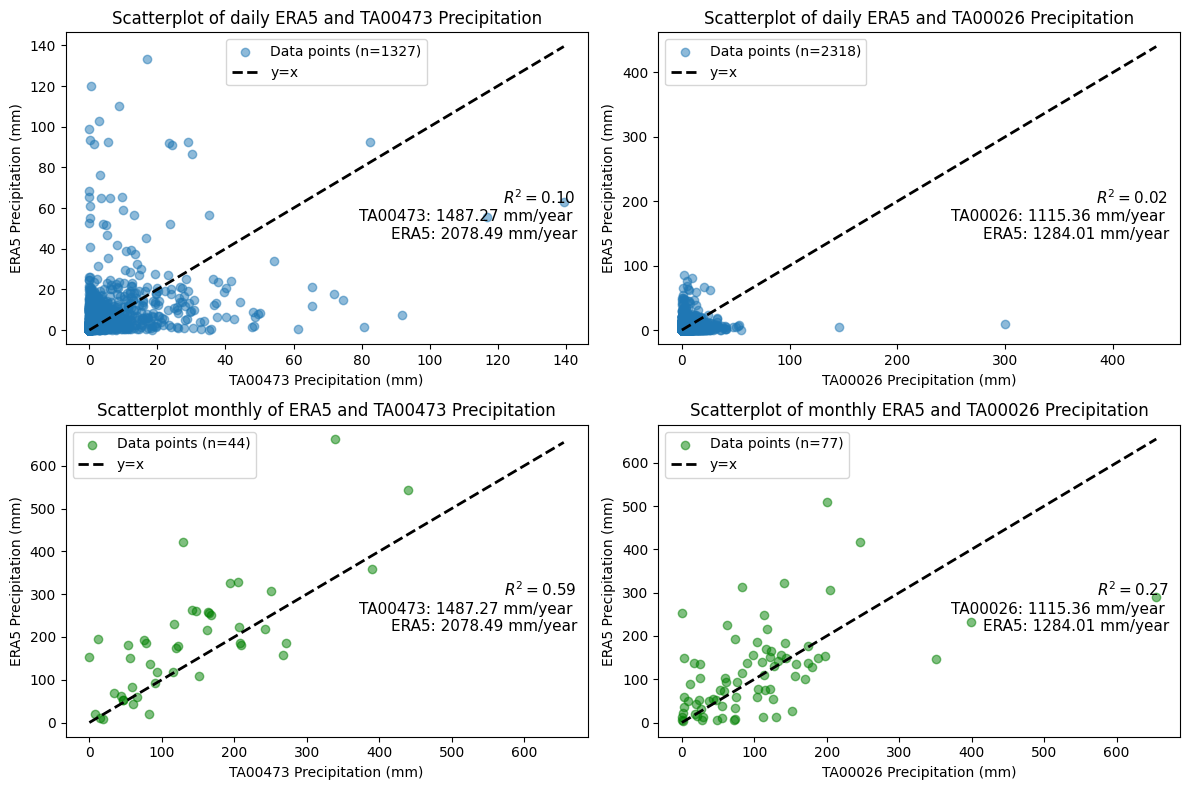

In [24]:
fig1, ax1 = plt.subplots(2, 2, figsize=(12, 8))

ax1[0,0].scatter(TA00473['precipitation (mm)'], era5_precip_TA00473_df['tp'], marker='o', alpha=0.5, label=f"Data points (n={len(TA00473['precipitation (mm)'])})")
ax1[0,0].plot(x, y, 'k--', lw=2, label='y=x')
ax1[0,0].set_xlabel('TA00473 Precipitation (mm)')
ax1[0,0].text(0.98, 0.50, f'$R^2 = {r_squared_era5_473:.2f}$ \nTA00473: {TA00473_yearly_mean[0]:.2f} mm/year \nERA5: {era5_precip_TA00473_df_yearly_mean:.2f} mm/year',
         transform=ax1[0,0].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[0,0].set_ylabel('ERA5 Precipitation (mm)')
ax1[0,0].set_title('Scatterplot of daily ERA5 and TA00473 Precipitation')
ax1[0,0].legend()
plt.tight_layout()

ax1[0,1].scatter(TA00026['precipitation (mm)'], era5_precip_TA00026_df['tp'], marker='o', alpha=0.5, label=f"Data points (n={len(TA00026['precipitation (mm)'])})")
ax1[0,1].plot(x2, y2, 'k--', lw=2, label='y=x')
ax1[0,1].set_xlabel('TA00026 Precipitation (mm)')
ax1[0,1].text(0.98, 0.5, f'$R^2 = {r_squared_era5_26:.2f}$ \nTA00026: {TA00026_yearly_mean[0]:.2f} mm/year \nERA5: {era5_precip_TA00026_df_yearly_mean:.2f} mm/year',
            transform=ax1[0,1].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[0,1].set_ylabel('ERA5 Precipitation (mm)')
ax1[0,1].set_title('Scatterplot of daily ERA5 and TA00026 Precipitation')

ax1[0,1].legend()
plt.tight_layout()

ax1[1,0].scatter(TA00473_mon['precipitation (mm)'], era5_precip_TA00473_mon['tp'], marker='o', color='green', alpha=0.5, label=f"Data points (n={len(TA00473_mon['precipitation (mm)'])})")
ax1[1,0].plot(x1, y1, 'k--', lw=2, label='y=x')
ax1[1,0].set_xlabel('TA00473 Precipitation (mm)')
ax1[1,0].text(0.98, 0.50, f'$R^2 = {r_squared_era5_473_mon:.2f}$ \nTA00473: {TA00473_yearly_mean[0]:.2f} mm/year \nERA5: {era5_precip_TA00473_df_yearly_mean:.2f} mm/year',
         transform=ax1[1,0].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[1,0].set_ylabel('ERA5 Precipitation (mm)')
ax1[1,0].set_title('Scatterplot monthly of ERA5 and TA00473 Precipitation')
ax1[1,0].legend()
plt.tight_layout()

ax1[1,1].scatter(TA00026_mon['precipitation (mm)'], era5_precip_TA00026_mon['tp'], marker='o', color='green', alpha=0.5, label=f"Data points (n={len(TA00026_mon['precipitation (mm)'])})")
ax1[1,1].plot(x1, y1, 'k--', lw=2, label='y=x')
ax1[1,1].set_xlabel('TA00026 Precipitation (mm)')
ax1[1,1].text(0.98, 0.5, f'$R^2 = {r_squared_era5_26_mon:.2f}$ \nTA00026: {TA00026_yearly_mean[0]:.2f} mm/year \nERA5: {era5_precip_TA00026_df_yearly_mean:.2f} mm/year',
            transform=ax1[1,1].transAxes,
            fontsize=11,
            horizontalalignment='right',
            verticalalignment='top',
            )
ax1[1,1].set_ylabel('ERA5 Precipitation (mm)')
ax1[1,1].set_title('Scatterplot of monthly ERA5 and TA00026 Precipitation')

ax1[1,1].legend()
plt.tight_layout()


plt.savefig(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\5. Python\Figures\ERA5_vs_TAHMO_precipitation_scatter.png", dpi=300, bbox_inches='tight')
plt.show()

In [25]:
chirps = xr.open_dataset(r"C:\Users\jmsch\OneDrive\Documenten\Studie\Civiele Techniek\Environmental Engineering\Year 2\Afstuderen\NBS Nakuru Kenia\2. QGIS + Wflow\Wflow - WitteveenBos\wflow_JMS\HydroMT\Nakuru_res0.002dg_complete_chirps\inmaps_chirps_Nakuru_86400_2007_2021.nc")

In [26]:
display(chirps)

<xarray.Dataset> Size: 5GB
Dimensions:      (time: 5479, longitude: 233, latitude: 321)
Coordinates:
  * time         (time) datetime64[ns] 44kB 2007-01-01 2007-01-02 ... 2021-12-31
  * longitude    (longitude) float64 2kB 35.84 35.84 35.84 ... 36.22 36.22 36.22
  * latitude     (latitude) float64 3kB -0.1821 -0.1838 ... -0.7138 -0.7154
    spatial_ref  int32 4B ...
Data variables:
    precip       (time, latitude, longitude) float32 2GB ...
    pet          (time, latitude, longitude) float32 2GB ...
    temp         (time, latitude, longitude) float32 2GB ...
Attributes:
    standard_name:  precipitation
    units:          mm
    _FillValue:     nan
    unit:           mm
    precip_fn:      chirps_global

In [27]:
print(f'The mean catchment precipitation for the timeseries is {chirps.precip.mean(axis=(0,1,2)):.2f} mm/day')
print(f'The mean catchment potential evaporation for the timeseries is {chirps.pet.mean(axis=(0,1,2)):.2f} mm/day')

The mean catchment precipitation for the timeseries is 2.93 mm/day
The mean catchment potential evaporation for the timeseries is 3.47 mm/day
